In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Повторно загружаем присланный файл
file_path = r'/content/Данные_для_курсовои_Классическое_МО.xlsx'
xls = pd.ExcelFile(file_path)

# Смотрим, какие листы есть в Excel-файле
xls.sheet_names

['Sheet1']

In [ ]:
df = xls.parse('Sheet1')
print(df.head())

   Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0           

In [ ]:
df.info()  # показывает количество строк, пропуски, типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [ ]:
print(df.columns.tolist())

['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8',

'Unnamed: 0' —  это колонка индекса из Excel. Её можно удалить:

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

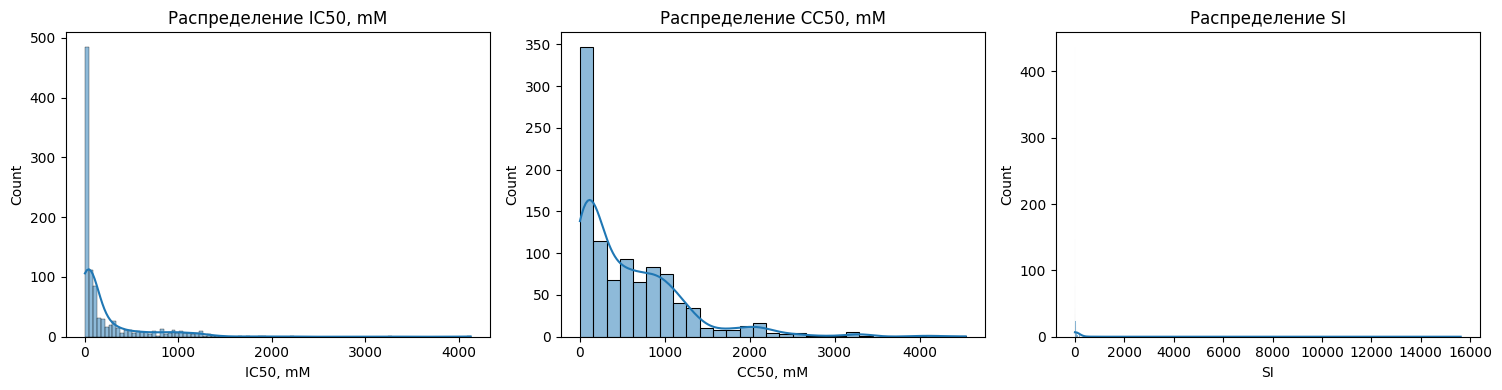

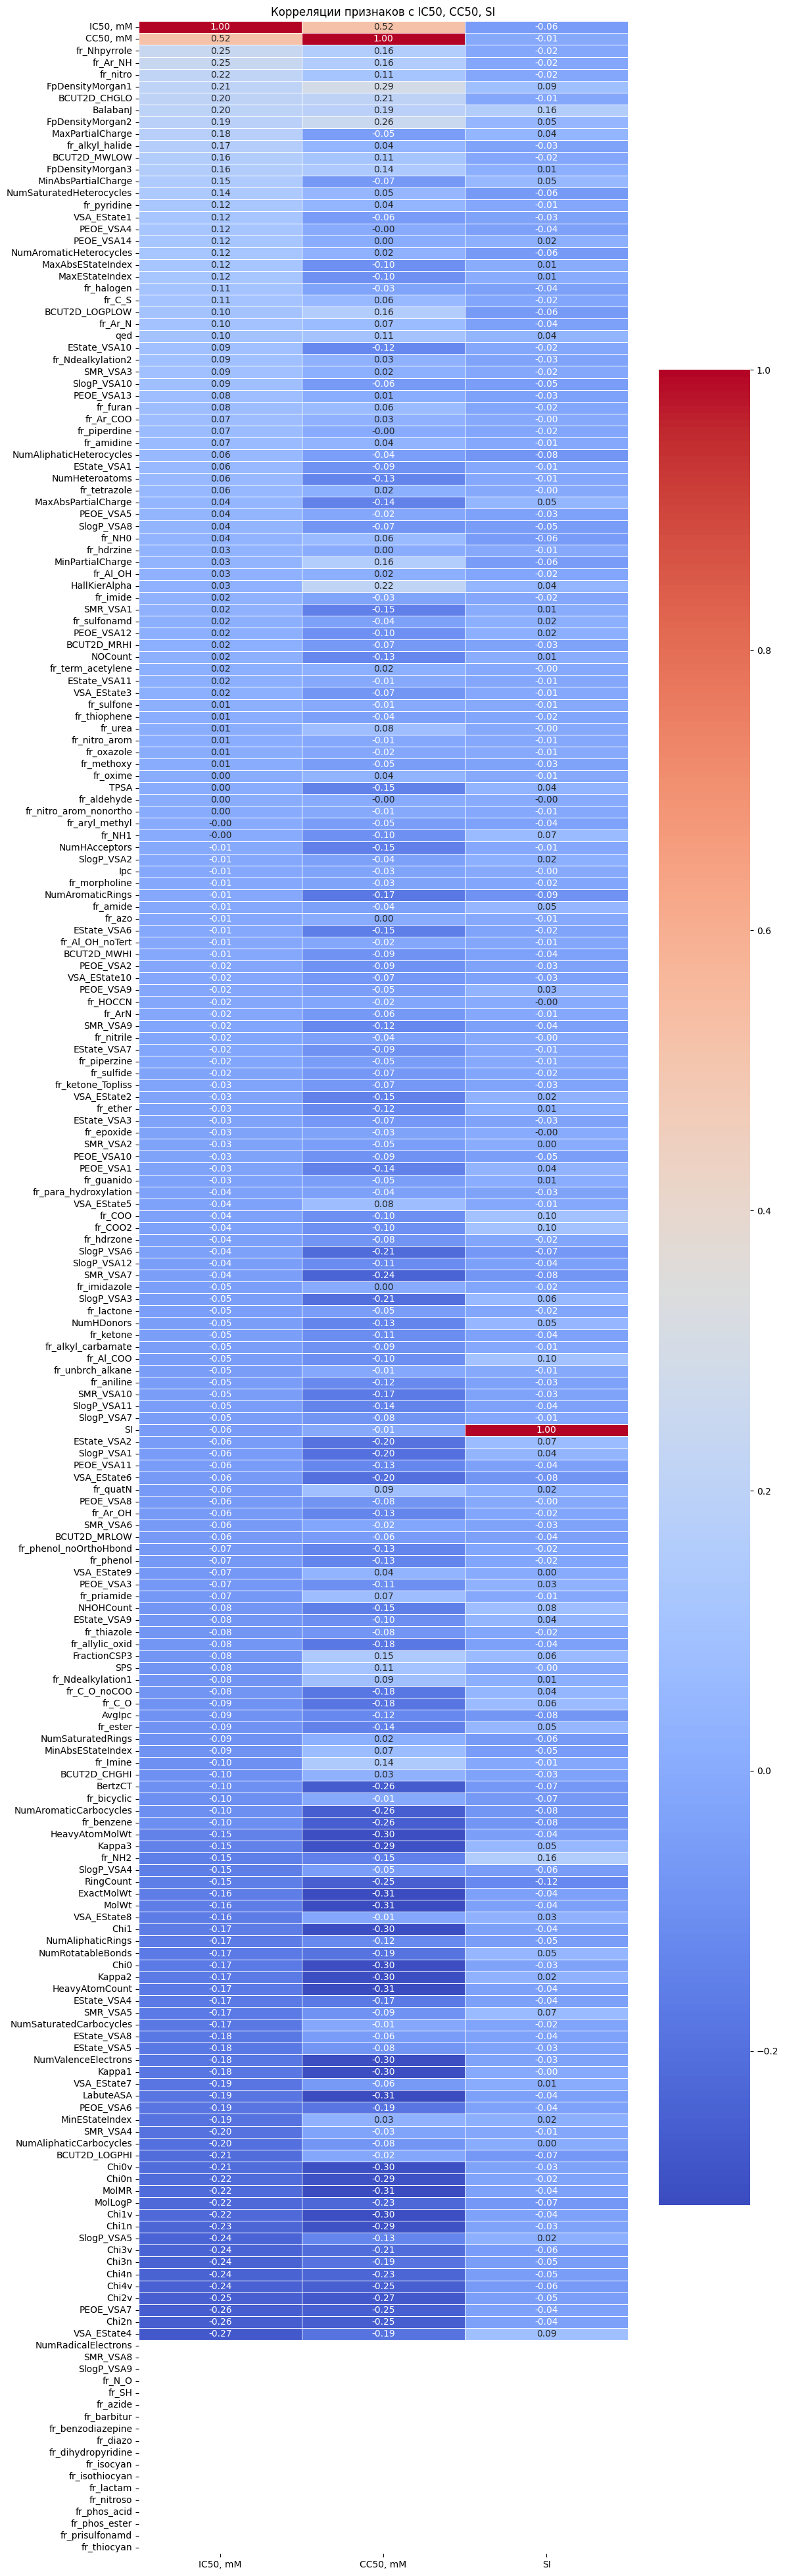

In [ ]:
# Проверка пропусков
missing_summary = df.isnull().sum()

# Основные статистики по целевым переменным
targets = ["IC50, mM", "CC50, mM", "SI"]
target_describe = df[targets].describe()

# Построим гистограммы распределения целевых переменных
plt.figure(figsize=(15, 4))
for i, col in enumerate(targets):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Распределение {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Корреляционная матрица для всех числовых признаков + тепловая карта
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 50))
sns.heatmap(corr_matrix[targets].sort_values(by="IC50, mM", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляции признаков с IC50, CC50, SI")
plt.show()

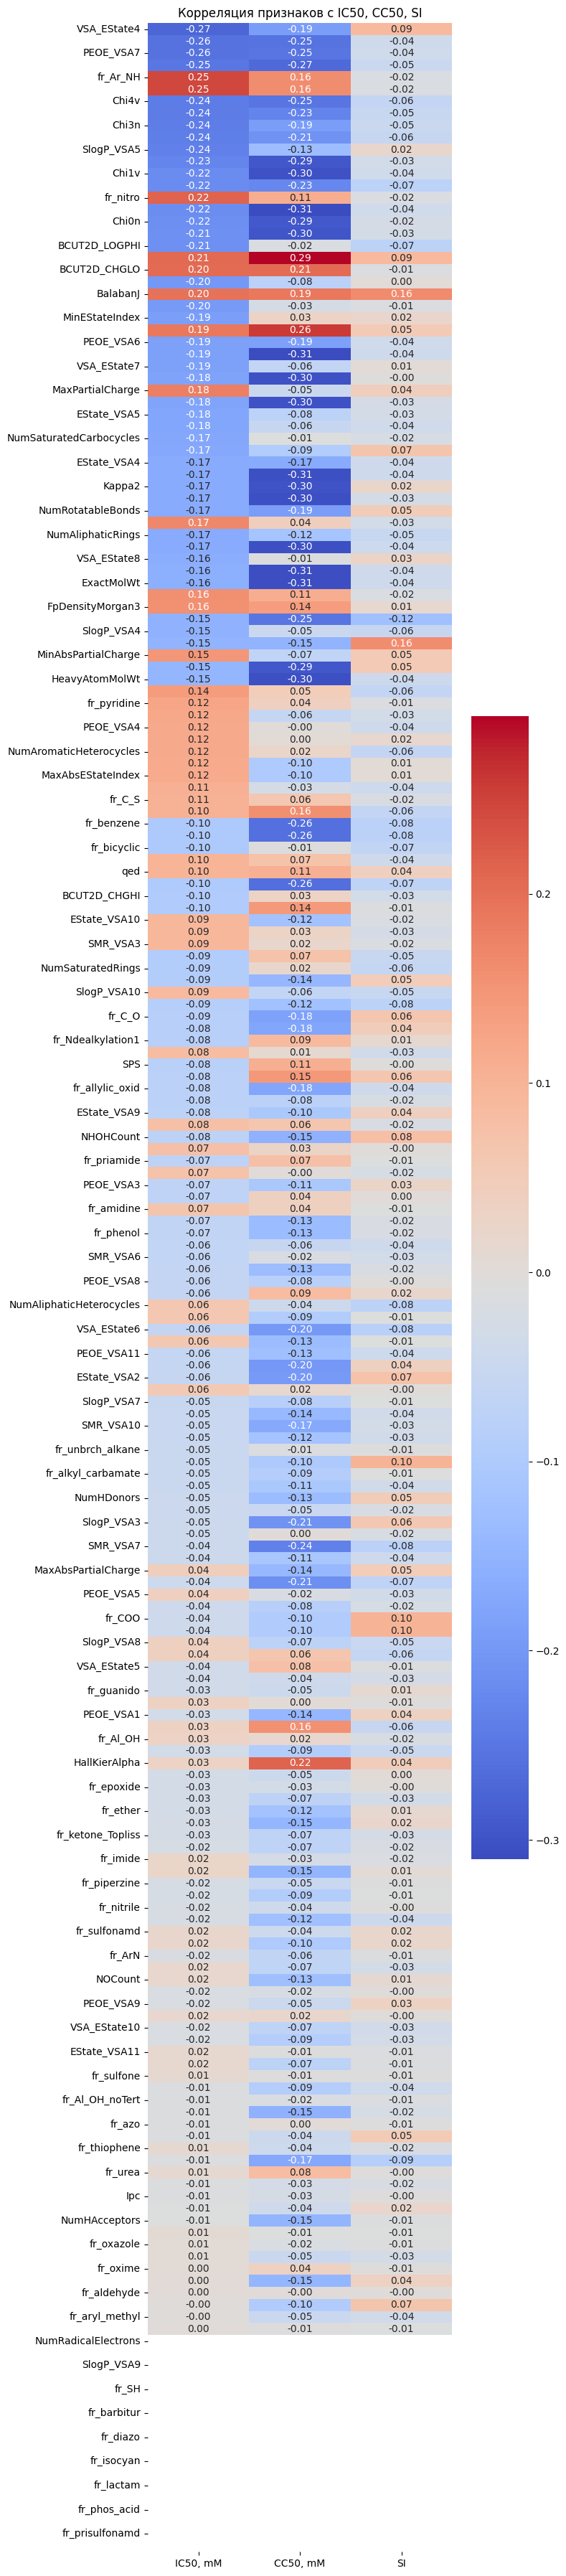

In [ ]:
# Корреляции таргетов с признаками
# Корреляционная матрица
corr = df.corr(numeric_only=True)

# Оставим только строки, коррелирующие с IC50, CC50, SI
corr_targets = corr[targets].drop(index=targets)

# Отсортируем по модулю корреляции с IC50
corr_sorted = corr_targets.reindex(corr_targets['IC50, mM'].abs().sort_values(ascending=False).index)

# Построим тепловую карту
plt.figure(figsize=(8, 36))
sns.heatmap(corr_sorted, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляция признаков с IC50, CC50, SI")
plt.tight_layout()
plt.show()

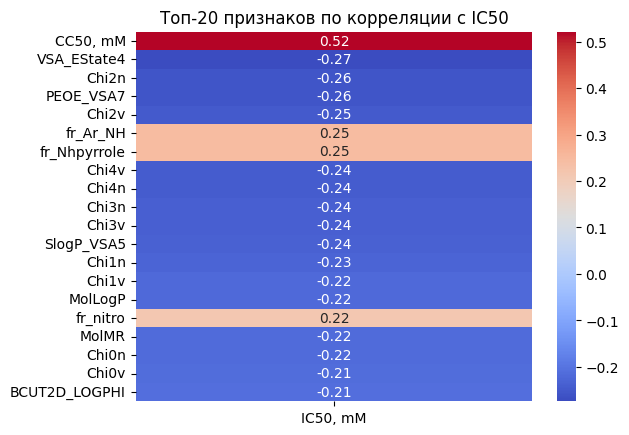

In [ ]:
# Только IC50 и top 20 признаков
top_ic50 = corr['IC50, mM'].drop('IC50, mM').abs().sort_values(ascending=False).head(20).index
sns.heatmap(corr.loc[top_ic50, ['IC50, mM']], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Топ-20 признаков по корреляции с IC50")
plt.show()

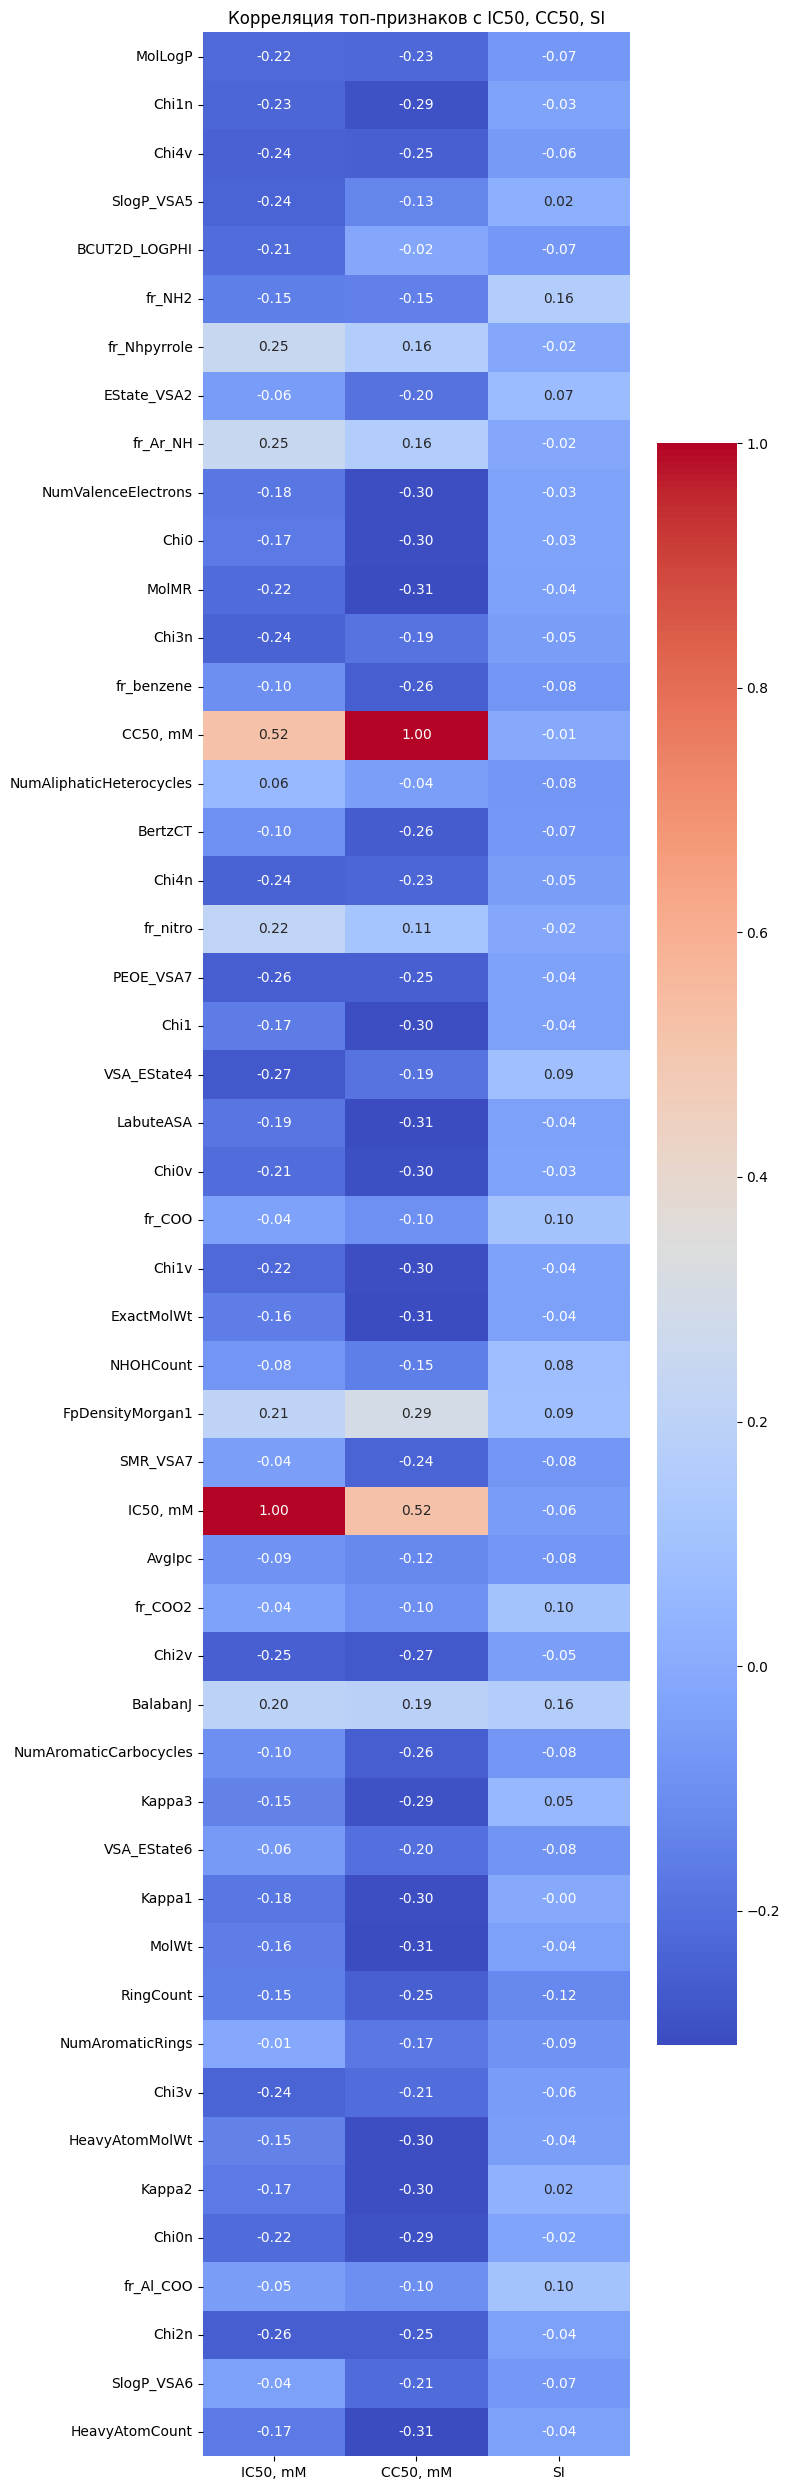

In [ ]:
# Считаем абсолютную корреляцию и берём top-N для каждого таргета
top_n = 20
top_features = []

for target in targets:
    top_corr = corr[target].drop(target).abs().sort_values(ascending=False).head(top_n)
    top_features.extend(top_corr.index)

# Удалим дубли
top_features = list(set(top_features))

# Построим срез корреляций по этим признакам
corr_subset = corr.loc[top_features, targets]

# Читаемая тепловая карта
plt.figure(figsize=(8, len(top_features) * 0.5))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляция топ-признаков с IC50, CC50, SI")
plt.tight_layout()
plt.show()

| Признак                          | Корреляция с `IC50, mM` | Комментарий                                                |
| -------------------------------- | ----------------------- | ---------------------------------------------------------- |
| `CC50, mM`                       | **+0.52**               | Логично: высокая токсичность может сопровождать активность |
| `VSA_EState4`                    | –0.27                   | Электронно-пространственный дескриптор                     |
| `Chi2n`, `Chi2v`                 | –0.26, –0.25            | Топологические индексы, отражающие разветвлённость         |
| `PEOE_VSA7`                      | –0.26                   | Зарядовое распределение                                    |
| `fr_Ar_NH`, `fr_Nhpyrrole`       | **+0.25**               | Наличие конкретных фрагментов связано с активностью        |
| `SlogP_VSA5`, `MolLogP`, `MolMR` | \~–0.22                 | Липофильность, молярный рефрактивный объём                 |
| `fr_nitro`                       | **+0.22**               | Нитрогруппа — важный фармакофор                            |
| `BCUT2D_LOGPHI`                  | –0.21                   | Спектральный дескриптор на основе логP                     |
| Остальные `Chi*`                 | –0.24...–0.21           | Топологические индексы (пространственная форма)            |


Корреляции не очень высокие, что нормально: активность (IC50) — сложно предсказуемый параметр.

Некоторые признаки имеют прямую связь (фрагменты, токсичность), другие — обратную (заряды, структура).

CC50 будет пересекаться как признак и как таргет — в моделях лучше исключить его при предсказании IC50.

In [ ]:
df.head()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
